# Assignment 6

In Assignment 4, we resolved two signals which have nearby frequencies. We saw that resolving two close frequencies depends on both the DFT size and the time duration that we take samples to calculate DFT. As you can remember, in that assignment, both signals have equal amplitudes. Do you think you can resolve two signals using the same procedure when they have unequal amplitudes? In this assignment, we will study for resolving two signals which have two close frequencies and unequal amplitudes.

### Part A
Generate two sinusoidal signals where $f=10$ Hz and $\Delta _f= 3$ Hz:

$ x_1(t)=cos(2 \pi f_1 t)$ and $ x_2(t)=\frac{1}{10}cos(2 \pi (f_1+\Delta _f) t)$

Suppose we have received the signal $x(t)$ where $x(t)=x_1(t)+x_2(t)$ and we will try to analyze the frequency domain respresentation of this signal. As it is seen, $x_2(t)$ has 10 times lower than the amplitude of $x_1(t)$. 

First let's compare unequal amplitude case with equal amplitude case. Create $x(t)$ and $x_{eq}(t)=cos(2 \pi f_1 t)+ cos(2 \pi (f_1+\Delta _f) t)$. Take the Fourier Transform and plot their spectrums first on different figures and then on the same figure. Plot the positive half, i.e. f is between 0 and 32 Hz to make your graphs more understandable. Label axes and put legend to the last figure. Use DFT size $N=512$, sampling frequency $f_s=64$ and $T=1$ that is the time duration that you will have samples.

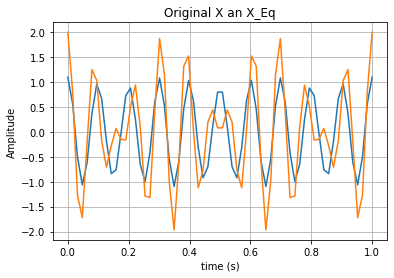

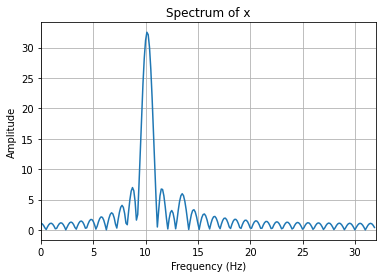

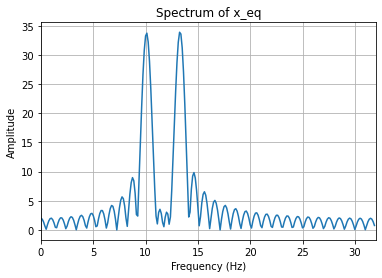

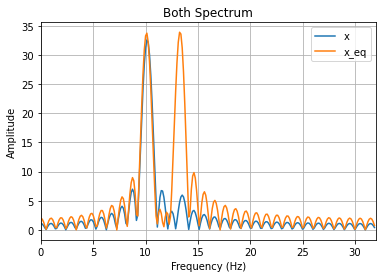

In [31]:
import numpy as np
import matplotlib.pyplot as plt
# Sampling frequency
fs = 64
T = 1
N = 512
t=np.linspace(0,T,T*fs)

f1 = 10
f2 = f1 + 3

x1 =  np.cos(2 * np.pi * f1 * t)
x2 = 0.1 * np.cos(2 * np.pi * f2 * t)

x = x1 + x2
# Generate the composite signal with equal amplitudes
x_eq = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t)



# Compute the Fourier Transform of the signals
X = np.fft.fft(x,N)
X_eq = np.fft.fft(x_eq,N)

# Frequency vector
f=np.fft.fftfreq(N, 1/fs)



plt.grid()
plt.plot(t,x)
plt.plot(t,x_eq)
plt.xlabel('time (s)')
plt.ylabel('Amplitude')
plt.title('Original X an X_Eq')
plt.show()

# Plot the positive half of the spectrum of x
plt.grid()
plt.plot(f[:N//2], np.abs(X[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of x')
plt.xlim(0, 32)
plt.show()

# Plot the positive half of the spectrum of x_eq
plt.grid()
plt.plot(f[:N//2], np.abs(X_eq[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of x_eq')
plt.xlim(0, 32)
plt.show()

# Plot the positive half of the spectrums of x and x_eq on the same figure
plt.grid()
plt.plot(f[:N//2], np.abs(X[:N//2]), label='x')
plt.plot(f[:N//2], np.abs(X_eq[:N//2]), label='x_eq')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Both Spectrum')
plt.xlim(0, 32)
plt.show()


In which case you can seperate the signals? Explain.

Since the size of the two signals collected in the X_EQ signal is equal, they are separated more clearly in the frequency domain. However, the X signal is more difficult to distinguish because it is the sum of two signals of 1/10 of the other.

Theoretically, we expect that when the amplitudes are equal, the signals can be resolved, however, in unequal case where one signal is 10 times weaker then the other one, the two frequencies are not distinguishable since  the weaker signal is buried under the sidelobes of the stronger signal. It means that longer sampling durations and increasing the DFT size is not enough to seperate these kind of signals. So we will apply another import technique which is *windowing*.

We will use Triangular and Hamming Window to distinguish the weaker signal. First let's see the effect of windows in time domain. (Remember that the window is function that is element-wise multiplied by the time domain signal)

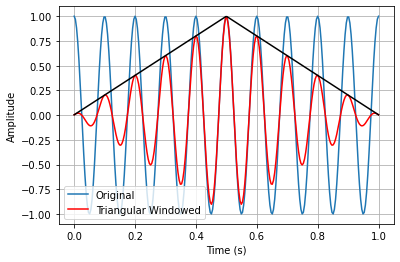

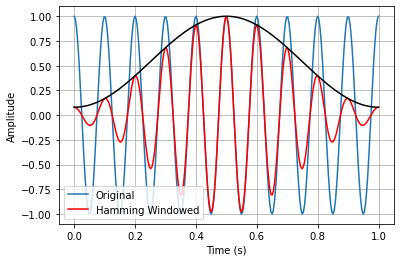

In [26]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt


# Create a time array from 0 to 1 with a step of 1/256
t = np.linspace(0, 1, 256)

# Create a frequency (f) of 10 Hz
f = 10

# Create a sinusoidal function using the time array and frequency
x= np.cos(2 * np.pi * f * t)


# Apply a triangular window to the signal
windowt = signal.triang(256)  # Generate triangular window
x_windowed = x * windowt  

# Plot the original and windowed signals
plt.grid()
plt.plot(t, x, label='Original')
plt.plot(t, x_windowed, 'r',label='Triangular Windowed')
plt.plot(t,windowt,'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower left")
plt.show()

windowh = signal.hamming(256)  # Generate Hamming window
x_windowed = x * windowh  

# Plot the original and windowed signals
plt.grid()
plt.plot(t, x, label='Original')
plt.plot(t, x_windowed,'r', label='Hamming Windowed')
plt.plot(t,windowh,'k')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc="lower left")
plt.show()




What do you see when you compare original signal with the windowed one? Explain.

Since the triangular window peaks at the middle and goes to 0 at both ends, we theoretically expect that the amplitude of the windowed signal also peak in the middle but decreases while moving toward to both ends. It means that we lose our signal energy at the start and end of the signal. Why do we want to lose energy? Because by using these kind of windows we can solve our problem of distinguishing the weaker signal :)

When you compare the original and windowed signals, you can see that applying a window to the signal has the effect of attenuating the amplitude of the signal at the start and end. This is because the window function is generally designed to have a value of 1 at the center of the window and gradually decrease to 0 at the edges.

The purpose of applying a window to a signal is to reduce spectral leakage and improve the resolution of the spectrum. 

### Part B

In this part you will apply triangular and Hamming windows to signal  $x(t)$ where $x(t)=x_1(t)+x_2(t)$ given in part A. Then you will take Fourier transforms and plot their spectrums.


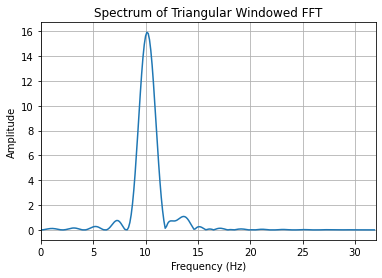

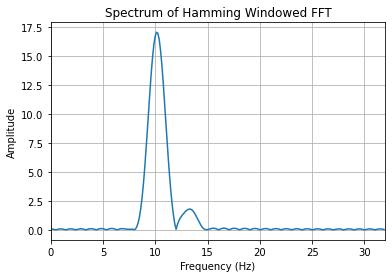

In [27]:
## write your code here
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 64
T = 1
N = 512
t=np.linspace(0,T,T*fs)

f1 = 10
f2 = f1 + 3

x1 =  np.cos(2 * np.pi * f1 * t)
x2 = 0.1 * np.cos(2 * np.pi * f2 * t)

x = x1 + x2
# window x(t) by element wise multiplication
windowt = signal.triang(64)  # Generate triangular window
x_windowed_t = x * windowt

windowh = signal.hamming(64)  # Generate Hamming window
x_windowed_h = x * windowh

#Take Fourier Transform and plot the spectrums
x_windowed_tfft = np.fft.fft(x_windowed_t,N)
x_windowed_hfft = np.fft.fft(x_windowed_h,N)

# Frequency vector
f=np.fft.fftfreq(N, 1/fs)
plt.grid()
plt.plot(f[:N//2], np.abs(x_windowed_tfft[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Triangular Windowed FFT')
plt.xlim(0, 32)
plt.show()

# Plot the positive half of the spectrum of x_eq
plt.grid()
plt.plot(f[:N//2], np.abs(x_windowed_hfft[:N//2]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectrum of Hamming Windowed FFT')
plt.xlim(0, 32)
plt.show()


Now can you seperate the weaker signal? Which window is better and why? Justify your reasoning.

Signals can be easily separated after Windowing. Since a more smooth window is used in the hamming process, it can be better separation.

Generally, the magnitude of spectrums are given in dB scale. Therefore, in this part you will plot the spectrums of original signal and the windowed ones in dB scale. Remember the formula where $A$ is the Fourier Transform of the signal: $$ A_{dB}=20log{|A|}$$. 

You can use subplots to show them below each other. Use "fig, ax=plt.subplots(3)" and then "ax[0].plot(...)" etc. Call np.log10 function to take base 10 logarithm. Set y axes between -20 dB to 35 dB in order to compare the spectrums better (you can use set_ylim function). Don't forget to label the axes. As a bonus, add  marker on 10 Hz and 13 Hz to indicate the signals that we try to seperate. 

What happens to the main lobe of the original signal when we apply windows? Windowing makes you to seperate weaker signal, but is there any trade-offs? Comment on your results.

In general, the trade-off of windowing is that it reduces the sidelobes of the spectrum at the expense of a wider main lobe and reduced spectral resolution. This means that while windowing can be useful for reducing interference from sidelobes, it can also make it more difficult to resolve closely spaced frequency components in the signal.

The specific trade-offs of windowing will depend on the characteristics of the signal being analyzed and the specific requirements of the analysis. Different window functions have different properties in terms of sidelobe suppression and spectral resolution, so it is important to choose the appropriate window function for the specific needs of the application.

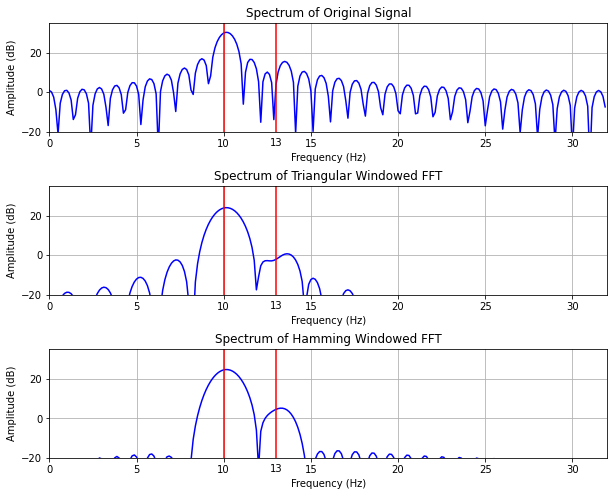

In [24]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
fs = 64
T = 1
N = 512
t=np.linspace(0,T,T*fs)

f1 = 10
f2 = f1 + 3

x1 =  np.cos(2 * np.pi * f1 * t)
x2 = 0.1 * np.cos(2 * np.pi * f2 * t)

x = x1 + x2

windowt = signal.triang(64)  # Generate triangular window
x_windowed_t = x * windowt

windowh = signal.hamming(64)  # Generate Hamming window
x_windowed_h = x * windowh

#Take Fourier Transform and plot the spectrums
x_windowed_tfft = np.fft.fft(x_windowed_t,N)
x_windowed_hfft = np.fft.fft(x_windowed_h,N)
xfft = np.fft.fft(x, N)

#FFTs to dB scale
xfft_db = 20 * np.log10(np.abs(xfft))
x_windowed_tfft_db = 20 * np.log10(np.abs(x_windowed_tfft))
x_windowed_hfft_db = 20 * np.log10(np.abs(x_windowed_hfft))
f=np.fft.fftfreq(N, 1/fs)
# Set up subplots
fig, ax = plt.subplots(3, 1, figsize=(10, 8))



ax[0].plot(f[:N//2], xfft_db[:N//2],color='b')
ax[0].set_title('Spectrum of Original Signal')
ax[0].set_xlabel('Frequency (Hz)')
ax[0].set_ylabel('Amplitude (dB)')
ax[0].set_xlim(0, 32)
ax[0].set_ylim(-20, 35)
ax[0].grid()


ax[1].plot(f[:N//2], x_windowed_tfft_db[:N//2],color='b')
ax[1].set_title('Spectrum of Triangular Windowed FFT')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('Amplitude (dB)')
ax[1].set_xlim(0, 32)
ax[1].set_ylim(-20, 35)
ax[1].grid()



ax[2].plot(f[:N//2], x_windowed_hfft_db[:N//2],color='b')

ax[2].set_title('Spectrum of Hamming Windowed FFT')
ax[2].set_xlabel('Frequency (Hz)')
ax[2].set_ylabel('Amplitude (dB)')
ax[2].set_xlim(0, 32)
ax[2].set_ylim(-20, 35)
ax[2].grid()


ax[0].axvline(10, color='r', linestyle='solid')
ax[0].axvline(13, color='r', linestyle='solid')
ax[1].axvline(10, color='r', linestyle='solid')
ax[1].axvline(13, color='r', linestyle='solid')
ax[2].axvline(10, color='r', linestyle='solid')
ax[2].axvline(13, color='r', linestyle='solid')
ax[0].text(13, -28, '13', ha='center', va='bottom')
ax[1].text(13, -28, '13', ha='center', va='bottom')
ax[2].text(13, -28, '13', ha='center', va='bottom')

fig.subplots_adjust(hspace=0.5)
plt.show()


When the DB scale was in plot, we have seen that the Hamming and Triangular operations work in the separation of the signal in low magnitude. Hamming is the better choose for seperating. 